# 문제 1
- 줄어들지 않아
- https://www.acmicpc.net/problem/2688

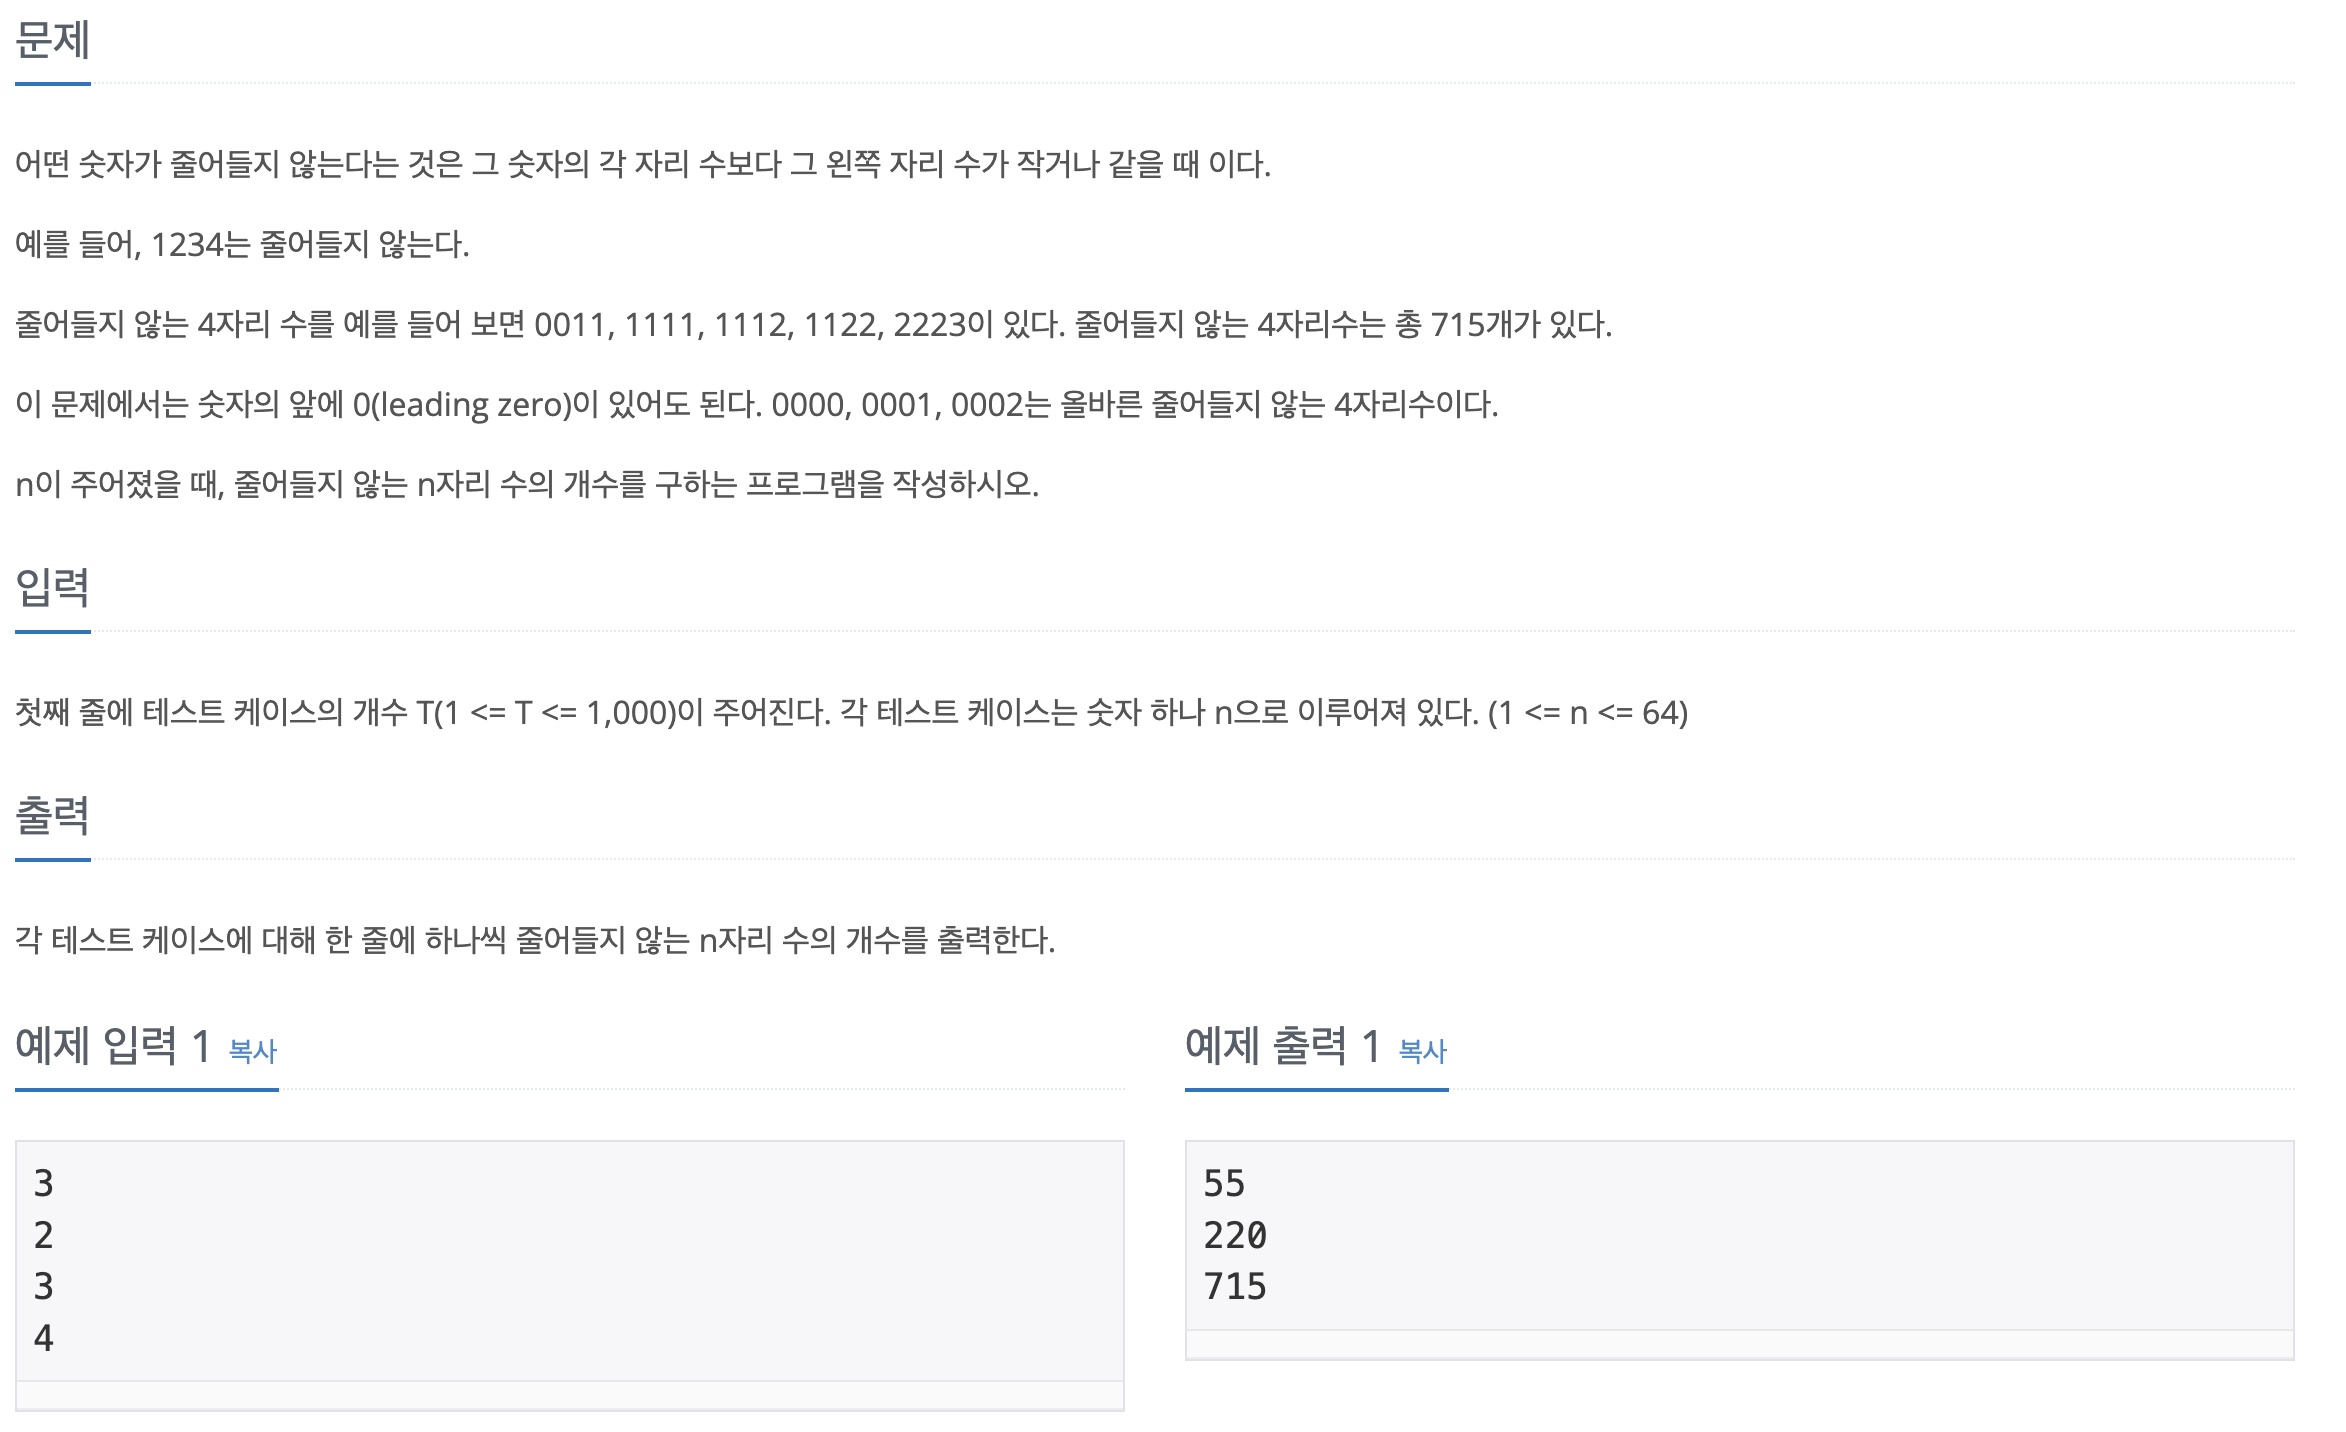


## Step
- 끝나는 숫자마다 몇개의 수가 존재하는지 기록
    - ex) 0은 몇개, 1은 몇개...
    - 0으로 끝난 숫자는 그 뒤에 0을 붙일 수 밖에 없다.
    - 만약 새로운 숫자를 뒤에 붙이고 싶은데 그 숫자가 k라면, 이전 자리수까지 만든 숫자들중, k와 같거나 작은 숫자로 끝나는 숫자들에만 붙일 수 있다.
        - 이 정보를 이용해서 점화식 만들기
        

- n자리수별 만들 수 있는 개수를 dp에 저장한다.

In [ ]:
import sys
# input = sys.stdin.readline

# 입력부분
n = int(input())
test = []
for _ in range(n):
    test.append(int(input()))

# base dp 생성
dp = [[1,1,1,1,1,1,1,1,1,1] for _ in range(max(test)+1)]

# 이전 인덱스 dp배열에서 j와 같거나 작은 숫자로 끝나는 개수의 합을 넣어준다.
for i in range(1,len(dp)):
    for j in range(10):
        dp[i][j] = sum(dp[i-1][:(j+1)])
        
for each in test:
    print(sum(dp[each-1]))

- 과정 뜯어보기

In [37]:
n = int(input())
test = []
for _ in range(n):
    test.append(int(input()))

3
2
3
4


In [42]:
dp = [[1,1,1,1,1,1,1,1,1,1] for _ in range(max(test)+1)]
dp

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [43]:
for i in range(1,len(dp)):
    for j in range(10):
        dp[i][j] = sum(dp[i-1][:(j+1)])

dp

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 3, 6, 10, 15, 21, 28, 36, 45, 55],
 [1, 4, 10, 20, 35, 56, 84, 120, 165, 220],
 [1, 5, 15, 35, 70, 126, 210, 330, 495, 715]]

In [45]:
for each in test:
    print(sum(dp[each-1]))

55
220
715


# 문제 2
- 내려가기
- https://www.acmicpc.net/problem/2096

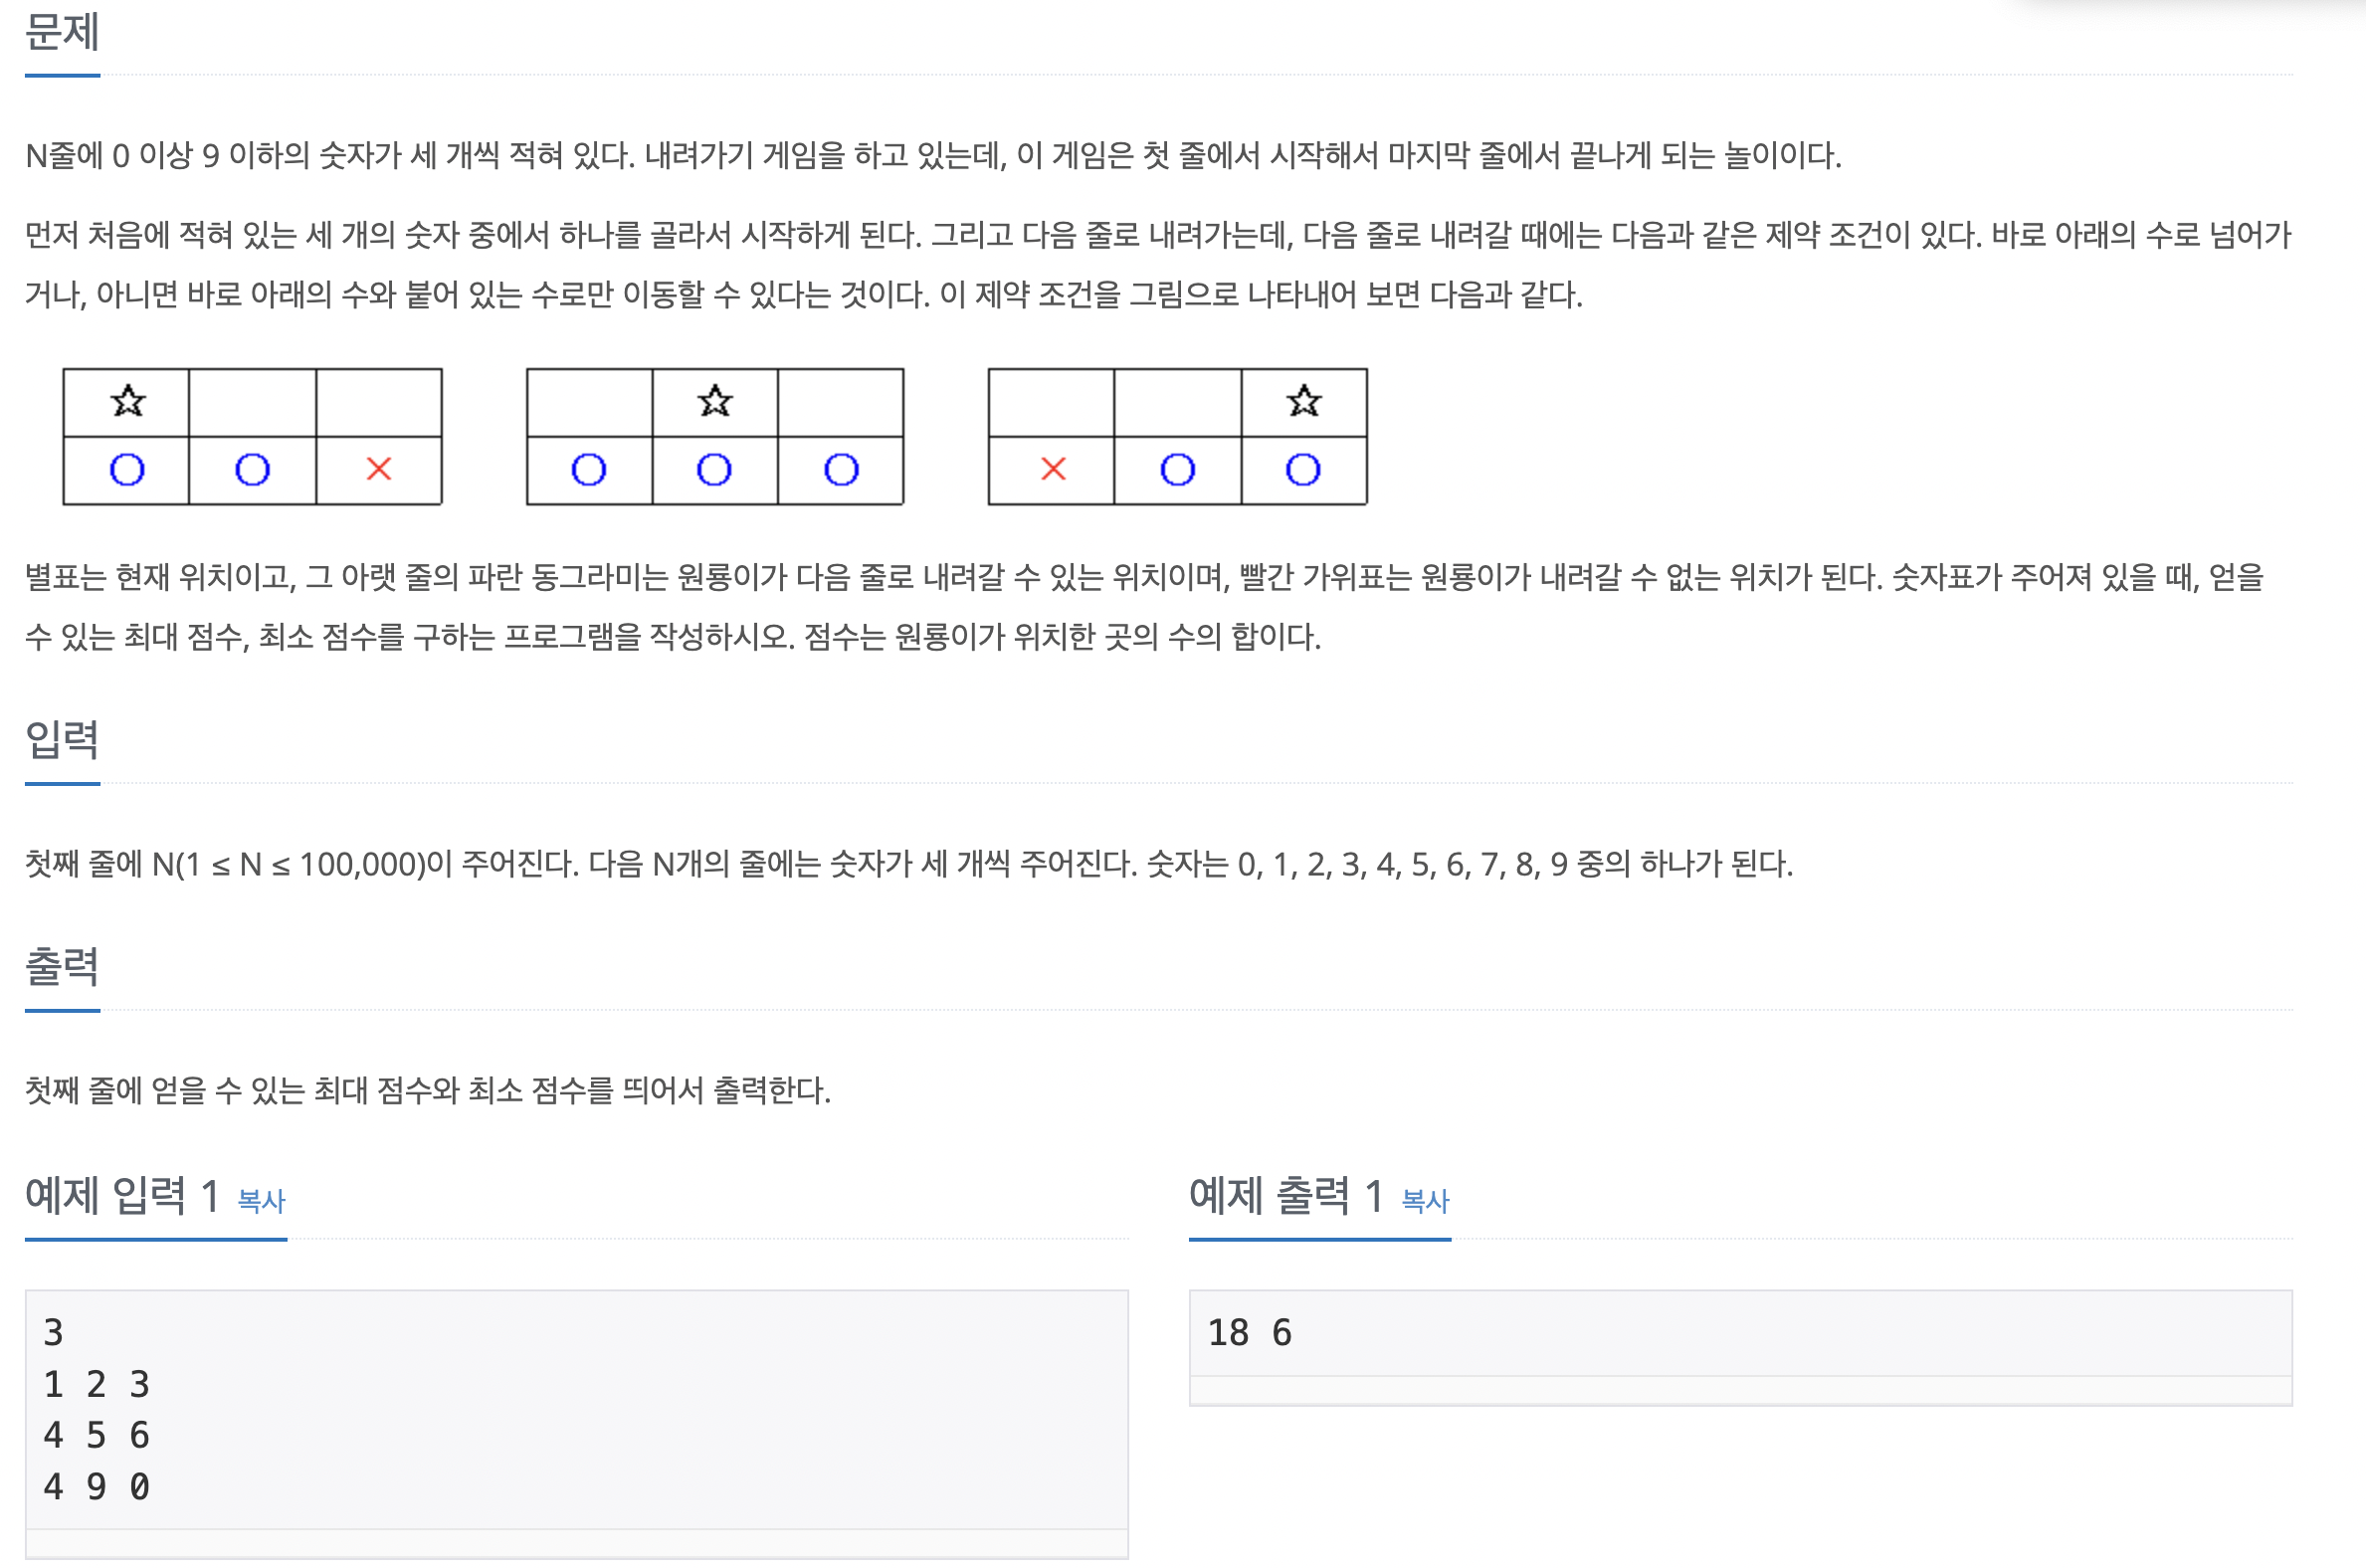
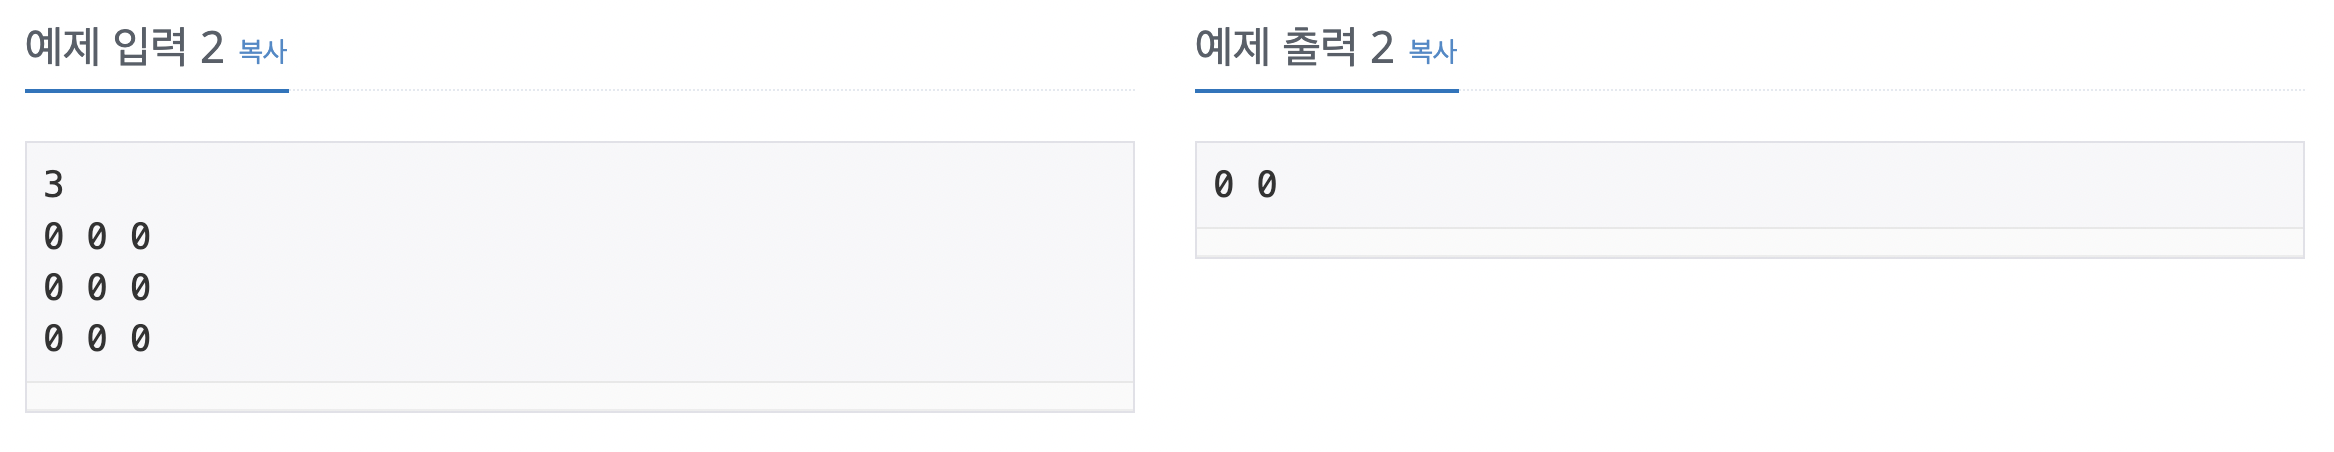

## Step
- 언뜻보면 굉장히 간단해 보이나 메모리한계가 극히 작은 문제이다.
- 따라서 한 줄씩 받고 그 때의 최소, 최대값을 찾아서 갱신해나가야 할 듯.
- 1. 첫 줄을 받고, 만약 n = 1 이라면 현재 상태에서의 최대값과 최소값 반환 (이 부분 반례를 찾지 못해서 시행착오가 발생)
- 2. 그 다음줄을 받고, 현재 존재하는 2개의 줄로 만들어 낼 수 있는 최대값(최소값)배열을 기존 배열에 덮어쓰기
    - 이후 부터는, 덮어쓴 배열과 새로들어오는 배열로 2번의 작업을 반복

In [3]:
import sys
# input = sys.stdin.readline
n = int(input())

board = list(map(int,input().split()))
max_board = board[:]
min_board = board[:]

if n == 1:
    print(max(board), min(board))
else:
    for _ in range(n-1):
        tmp = list(map(int,input().split()))
        max_res = [-1] * 3
        min_res = [9000000] * 3
        for i in range(len(tmp)):
            for d in [-1,0,1]:
                ni = i + d
                if 0<=ni<3:
                    max_res[ni] = max(max_res[ni], max_board[i] + tmp[ni])
                    min_res[ni] = min(min_res[ni], min_board[i] + tmp[ni])

        max_board = max_res[:]
        min_board = min_res[:]

    print(max(max_res), min(min_res))

3
1 2 3
4 5 6
4 9 0
18 6


## 백준 풀이에서 찾은 신기한 풀이
- kangjj17님
- 어차피 3열이니까, a,b,c식으로 번호를 매기고 
- a에는 a,b중 최대, b에는 a,b,c중 최대, c에는 b,c중 최대 점수를 넣어준다
    - 이러면 내가 구현했던 if 0<=ni<3 부분이 필요없어진다

In [ ]:
import sys
inp = sys.stdin.readline

n = int(input())
a, b, c = map(int, inp().split())
xa, xb, xc, na, nb, nc = a, b, c, a, b, c
for _ in range(1, n) :
    aa, bb, cc = map(int, inp().split())
    xa, xb, xc = aa+max(xa, xb), bb+max(xa, xb, xc), cc+max(xb, xc)
    na, nb, nc = aa+min(na, nb), bb+min(na, nb, nc), cc+min(nb, nc)
print(max(xa, xb, xc), min(na, nb, nc))

# 문제 3
- 게임 개발
- https://www.acmicpc.net/problem/1516

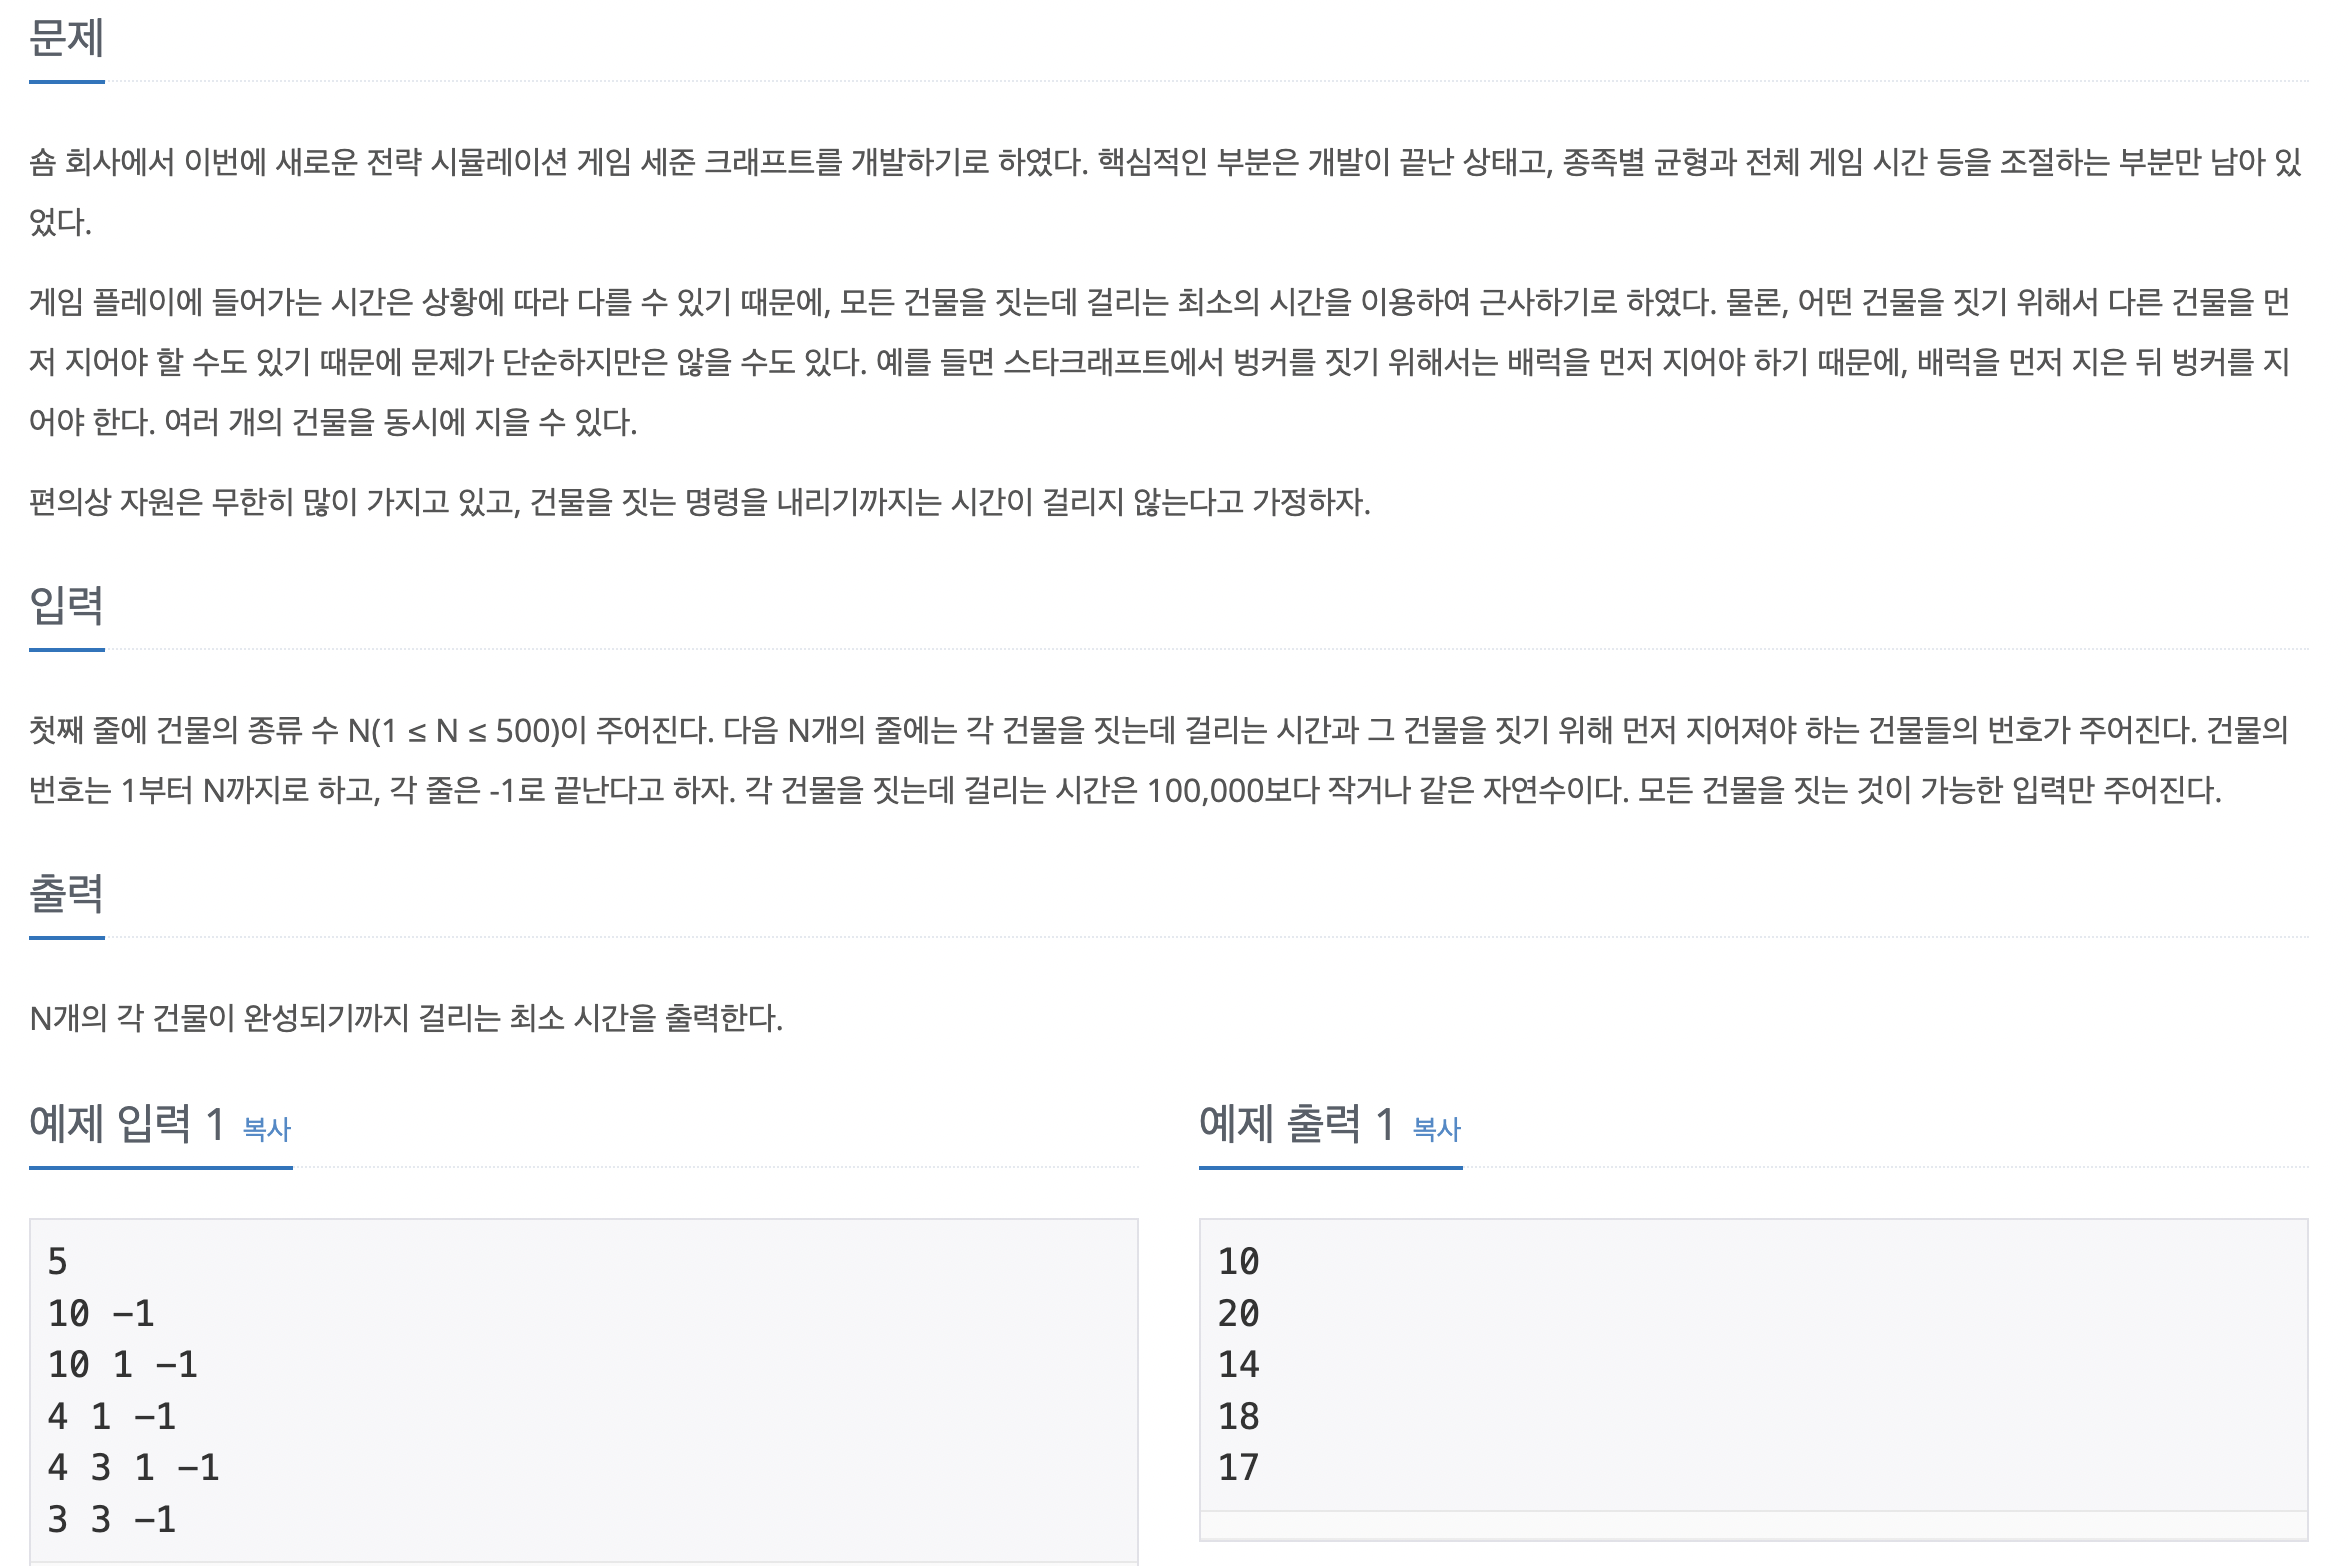

## Step
- 위상정렬 이용
- 그 전에 지어야할 건물이 있다면, 그 전에 지어야할 건물을 먼저 짓고 걸리는 시간을 더해줘서 짓도록
- 예제는 통과, 제출은 틀림

### 반례를 찾자
- 한 가지 건물에 여러개의 사전 조건 건물이 달려있을때, 그 순서와 시간 최대값을 고려해줘야 함을 수정함

In [123]:
import heapq
import sys
# input = sys.stdin.readline

n = int(input())
indegree = [0]*(n+1)
graph = [[] for _ in range(n+1)]
item = [0]
for i in range(n):
    tmp = list(map(int,input().split()))
    item.append(tmp.pop(0))
    for each in tmp:
        if each != -1:
            graph[each].append(i+1
                              )
            indegree[i+1] += 1
        else:
            break
            
heap = []
res = [0]*(n+1)
for i in range(1,n+1):
    if indegree[i] == 0:
        heapq.heappush(heap,i)
        res[i] += item[i]            # 전에 지을 건물이 없으니 그냥 바로 자기 자신 짓는데 걸리는 시간 저장

while heap: # heap 빌때까지 시행
    data = heapq.heappop(heap)
    
    for y in sorted(graph[data], key = lambda x : item[x]):  # 건축시간이 큰 순서대로 시간을 갱신한다 (반례뚫기 1)
        indegree[y] -= 1
        res[y] = max(res[y],res[data] + item[y])  # 그 전 건물을 짓는데 걸린 시간 + 해당 건물 짓는 시간 
                                                  # (반례뚫기 2 : max 함수 이용하여 같은 순번에서 건물을 지을 때 여태까지 걸린 최대시간을 고려)
        if indegree[y]==0:
            heapq.heappush(heap,y)
            
for i in range(1,len(res)):
    print(res[i])

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
10
20
14
18
17


- test code

In [ ]:
4

1 4 3 2 -1

2 4 -1

1 4 -1

1 -1

====4 3 2 1

In [108]:
n = int(input())
indegree = [0]*(n+1)
graph = [[] for _ in range(n+1)]
item = [0]
for i in range(n):
    tmp = list(map(int,input().split()))
    item.append(tmp.pop(0))
    for each in tmp:
        if each != -1:
            graph[each].append(i+1
                              )
            indegree[i+1] += 1
        else:
            break


4
1 4 3 2 -1
2 4 -1
1 4 -1
1 -1


In [109]:
import heapq

heap = []
res = [0]*(n+1)
for i in range(1,n+1):
    if indegree[i] == 0:
        heapq.heappush(heap,i)
        res[i] += item[i]            # 전에 지을 건물이 없으니 그냥 바로 자기 자신 짓는데 걸리는 시간 저장


In [110]:
indegree

[0, 3, 1, 1, 0]

In [111]:
res

[0, 0, 0, 0, 1]

In [112]:
graph

[[], [], [1], [1], [1, 2, 3]]

In [114]:
item

[0, 1, 2, 1, 1]

In [115]:
while heap: # heap 빌때까지 시행
    data = heapq.heappop(heap)
    print('현재 짓는 건물 :', data)
    tmp_max = 0
    for y in sorted(graph[data], key = lambda x : item[x]):
        
        print('다음에 지을 건물 :',y)
        indegree[y] -= 1
        res[y] = max(res[y],res[data] + item[y])  # 그 전 건물을 짓는데 걸린 시간 + 해당 건물 짓는 시간
        print('y를 지을 때 걸릴 시간 :', res[y])
        if indegree[y]==0:
            heapq.heappush(heap,y)

for i in range(1,len(res)):
    print(res[i])

현재 짓는 건물 : 4
다음에 지을 건물 : 1
y를 지을 때 걸릴 시간 : 2
다음에 지을 건물 : 3
y를 지을 때 걸릴 시간 : 2
다음에 지을 건물 : 2
y를 지을 때 걸릴 시간 : 3
현재 짓는 건물 : 2
다음에 지을 건물 : 1
y를 지을 때 걸릴 시간 : 4
현재 짓는 건물 : 3
다음에 지을 건물 : 1
y를 지을 때 걸릴 시간 : 4
현재 짓는 건물 : 1
4
3
2
1
